# Bayes Classifiers

## 1. Spam detection

- In this exercise, we use Bayes and na&iuml;ve Bayes classifiers to classify text message spam.

- We use a dataset from the UCI machine learning repository. Details can be found here [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "https://raw.githubusercontent.com/Graeme-kemp/Bayes-Classifiers/main/SMSSpamCollection.csv"
df = pd.read_csv(file, encoding="latin-1", sep='\t', header = None)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Split the data into a training set (80% of the data) and a testing set (20% of the data).

Compute the proportions of ham and spam in the training set.

In [2]:

df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [3]:
Pham = 4825/5572
Pspam = 747/5572
print(f"The Proportion of Ham and Spam labels in the whole dataset is: Spam = {Pspam:.3f}, Ham = {Pham:.3f}")

The Proportion of Ham and Spam labels in the whole dataset is: Spam = 0.134, Ham = 0.866


Adding different metrics to determine Spam/Ham Class of message

In [4]:
#A
import re

lengthlist = []
capslist = []
misclist = []
for i in df['message']:
    msglength = len(i)
    lengthlist.append(msglength) #Message Length
    

for i in df['message']:
    msgcaps = len(re.findall(r'[A-Z]', i))    
    capslist.append(msgcaps) #Message Capital Letters

for i in df['message']:
    misclength = len(re.findall(r'[^\s\d\w]', i))
    misclist.append(misclength)  # Number of non-number, non-digit characters in message  
      
df['length'] = lengthlist 
df['caps'] = capslist
df['misc'] = misclist
df.head()


,label,message,length,caps,misc
0,ham,"Go until jurong point, crazy.. Available only ...",111,3,9
1,ham,Ok lar... Joking wif u oni...,29,2,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,10,6
3,ham,U dun say so early hor... U c already then say...,49,2,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,2


In [5]:
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

Conditions = [(df['label'] == 'ham'), (df['label'] == 'spam')]
label = [0,1] #dummy coding the categorical variables into numbers

df['label0'] = np.select(Conditions, label)

In [6]:
#Length Bayes Classifier
np.random.seed(5)
X_tr, X_te, y_tr, y_te = train_test_split(df[['length']], df.label0, test_size=0.2)

In [7]:
mean0 = np.mean(X_tr[y_tr == 0], axis=0)
mean1 = np.mean(X_tr[y_tr == 1], axis=0)
cov0 = np.cov(X_tr[y_tr == 0].T)
cov1 = np.cov(X_tr[y_tr == 1].T)
pY0 = 1 - np.mean(y_tr)
pY1 = np.mean(y_tr)

In [8]:
norm = multivariate_normal.pdf

pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

LengthAcc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"Message Length Bayes Classifier Test Accuracy = {LengthAcc:.3f}")

Message Length Bayes Classifier Test Accuracy = 0.870


In [9]:
#Capital Letters Bayes Classifier
np.random.seed(5)
X_tr, X_te, y_tr, y_te = train_test_split(df[['caps']], df.label0, test_size=0.2)
mean0 = np.mean(X_tr[y_tr == 0], axis=0)
mean1 = np.mean(X_tr[y_tr == 1], axis=0)
cov0 = np.cov(X_tr[y_tr == 0].T) 
cov1 = np.cov(X_tr[y_tr == 1].T)
pY0 = 1 - np.mean(y_tr)
pY1 = np.mean(y_tr)

pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

CapAcc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"Capital Letter Bayes Classifier Test Accuracy = {CapAcc:.3f}")


Capital Letter Bayes Classifier Test Accuracy = 0.857


In [10]:
#Misc Characters Bayes Classifier
np.random.seed(5)
X_tr, X_te, y_tr, y_te = train_test_split(df[['misc']], df.label0, test_size=0.2)
mean0 = np.mean(X_tr[y_tr == 0], axis=0)
mean1 = np.mean(X_tr[y_tr == 1], axis=0)
cov0 = np.cov(X_tr[y_tr == 0].T) 
cov1 = np.cov(X_tr[y_tr == 1].T)
pY0 = 1 - np.mean(y_tr)
pY1 = np.mean(y_tr)

pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

MiscAcc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"Misc Character Bayes Test Accuracy = {MiscAcc:.3f}")


Misc Character Bayes Test Accuracy = 0.870


In [11]:
#Naive Bayes Classifier
#Classifier assumes indepdence between the predictor variables
from sklearn.naive_bayes import GaussianNB
np.random.seed(5)
X_tr, X_te, y_tr, y_te = train_test_split(df[['length', 'caps', 'misc']], df.label0, test_size=0.2)


gnb = GaussianNB()
y_pred = gnb.fit(X_tr, y_tr).predict(X_te)

NBAcc = 1- ((y_te != y_pred).sum()/y_te.count())

results = pd.DataFrame([LengthAcc,CapAcc,MiscAcc, NBAcc], 
                       ['Message Length Bayes Classifier','Capital Letter Bayes Classifier','Misc Character Bayes Classifier', 'GNB Classifier'],
                      columns = ['Accuracy'])
results
# GNB classifier shows better predicitve accuracy for Spam and Ham labels compared to the other single predictor classifiers

,Accuracy
Message Length Bayes Classifier,0.869955
Capital Letter Bayes Classifier,0.856502
Misc Character Bayes Classifier,0.869955
GNB Classifier,0.904933


In [13]:

digitlist = []
for i in df['message']:
    msgdig = len(re.findall(r'[0-9]', i))    
    digitlist.append(msgdig)
    
df['digits'] = digitlist 

np.random.seed(5)
X_tr, X_te, y_tr, y_te = train_test_split(df[['digits']], df.label0, test_size=0.2)
mean0 = np.mean(X_tr[y_tr == 0], axis=0)
mean1 = np.mean(X_tr[y_tr == 1], axis=0)
cov0 = np.cov(X_tr[y_tr == 0].T) 
cov1 = np.cov(X_tr[y_tr == 1].T)
pY0 = 1 - np.mean(y_tr)
pY1 = np.mean(y_tr)

pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

DigitAcc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"Message Digit Count Classifier Test accuracy = {DigitAcc:.3f}")

#The number of digits in a message provides a much better predictor model compared to the other classifiers created before
#This shows that the predictors used (or domain knowledge) plays a strong role in creating good models.  

Message Digit Count Classifier Test accuracy = 0.973


In [15]:
#E
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

X_tr, X_te, y_tr, y_te = train_test_split(df.message, df.label0, test_size=0.2)

model = MultinomialNB()
vectorizer = CountVectorizer()
model.fit(vectorizer.fit_transform(X_tr), y_tr)
y_pred = model.predict(vectorizer.transform(X_te))
VecAcc = 1- ((y_te != y_pred).sum()/y_te.count())
print(f"MultinomialNB message vectorized classifier accuracy: {VecAcc:.3f}")


MultinomialNB message vectorized classifier accuracy: 0.982


In [17]:
results = pd.DataFrame([LengthAcc,CapAcc,MiscAcc, NBAcc, DigitAcc, VecAcc], 
                       ['Message Length Bayes Classifier','Capital Letter Bayes Classifier','Misc Character Bayes Classifier',
                     'GB Classifier', 'Message Digit Classiier', 'CV MultinomialNB Classifier' ],
                      columns = ['Accuracy'])

display(results)


,Accuracy
Message Length Bayes Classifier,0.869955
Capital Letter Bayes Classifier,0.856502
Misc Character Bayes Classifier,0.869955
GB Classifier,0.904933
Message Digit Classiier,0.973094
CV MultinomialNB Classifier,0.982063



The Multinomial Naive Bayes classifier trained on the vectorized message shows the best predictive accuracy
compared to all the other approaches. This is likely due to the fact it takes in significantly more information in 
order to build the classifier.  Value counts of every type of character in each message are used to determine
the difference in the amount found in Spam or Ham messages. This is different from the simple Bayes classifiers used 


## 2. Distance-$h$ neighbors; broadcasting

- In this exercise, we implement a simple, 1-dimensional $h$-radius neighbors regressor. To practice broadcasting, **do this without using any loops**.

- The $k$-nearest neighbors regressor maps to $x$ to the average of the $y$-values of $k$ training points whose $x$-coordinates are closest to $x$.

- The distance-$h$ neighbors regressor maps $x$ to the average of the $y$-values of the training points whose $x$-coordinates are within a distance $h$ of $x$. (The number of such training points will vary with $x$.)

a. Write a function `make_mask` that constructs a *distance-$h$ mask* for a training data matrix `X_tr` with respect to a testing data matrix `X_te`. It should take `X_tr`, `X_te`, and `h` as inputs and return a `len(X_tr)`-by-`len(X_te)` matrix `mask` whose `[i,j]`-entry is `1` if the distance from `X_tr[i]` to `X_te[j]` is `< h` and `0`, otherwise.

In [18]:

'''
X_tr = np.random.uniform(size=5)
X_te = np.linspace(0, 1, 5)
y_tr = (X_tr - 0.5)**2 + 0.05*np.random.normal(size=5)
'''
def make_mask(X_tr, X_te, h):
    mask = (abs(X_tr.reshape(-1,1)) - abs(X_te))
    masked_array = np.where(abs(mask) < h, 1, 0)
    return masked_array


Use `make_mask` function to construct a python class implementing the distance-$h$ neighbors regressor by fleshing out `predict` method below:

In [19]:
from sklearn.base import BaseEstimator, RegressorMixin

class DistanceRegressor(BaseEstimator, RegressorMixin):
  def __init__(self, h=None):
    if h is None:
      raise "You forgot the h!"
    self.h = h

  def fit(self, X_tr, y_tr):
    self.X_tr = X_tr
    self.y_tr = y_tr

  def predict(self, X_te):
    y_training = np.sum(y_tr.reshape(-1,1)*make_mask(X_tr, X_te, self.h), axis = 0)
    n = np.sum(make_mask(X_tr, X_te, self.h),axis = 0)
    return y_training/n

Showing the Broadcasting Example

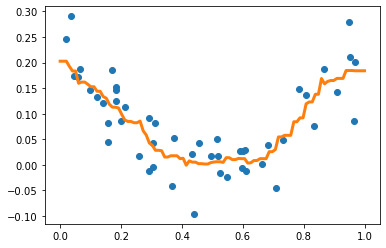

In [20]:
np.random.seed(42)
X_tr = np.random.uniform(size=50)
y_tr = (X_tr - 0.5)**2 + 0.05*np.random.normal(size=50)

model = DistanceRegressor(h=0.1)
model.fit(X_tr, y_tr)

X_te = np.linspace(0, 1, 100)
y_pred = model.predict(X_te) # uncomment when you've implemented DistanceRegressor
plt.plot(X_tr, y_tr, 'o') 
plt.plot(X_te, y_pred, lw=3) # uncomment when you've implemented DistanceRegressor
plt.show()